# Objetivo 1

## Índice de la práctica

- [1.Creación de datos](#1.Creación-de-datos)
- [Regresión logística](#Regresión-logística)
- [Neural Networks](#Neural-Networks)
- [Detección de Spam con Naïve Bayes (versión Multinomial)](Detección-de-Spam-con-Naïve-Bayes-(versión-Multinomial))
- [Tarea extra optativa](Tarea-extra-optativa)

In [1]:
import cv2
import glob
import skimage


#Librerias contornos 
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from skimage import data, io
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu 
from skimage.feature import hog
from skimage import data, exposure

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris #dataset de prueba
from sklearn.preprocessing import OneHotEncoder
from scipy.optimize import minimize
import sklearn.metrics as metrics

#para datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


# 1.Creación de datos

Se va a crear la matriz X, que es la que contiene las imágenes (se crea un dataset).

$devolverDiccionarioEtiquetas$

In [86]:
# $Sift$
#devuelve descriptor de Sift
def siftMaker(images00000_mod):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(images00000_mod.flatten(),None)    
    #quizas falta un tercer parametro:  imagen original
#     img=cv2.drawKeypoints(images00000_mod,kp, images00000_mod, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #cv2.imwrite('sift_keypoints.jpg',img)
    return des


# $Surf$
def surfmaker(images00000_mod):
    surf = cv2.xfeatures2d.SURF_create(400)
    kp, des = surf.detectAndCompute(images00000_mod,None)
    return des

# $Fast$ + $Brief$
def fastbrief_Maker(images00000_mod):
    fast = cv2.FastFeatureDetector_create()

    # find and draw the keypoints
    kp2 = fast.detect(images00000_mod,None)
    img2 = cv2.drawKeypoints(images00000_mod, kp2, None, color=(255,0,0))

    # Disable nonmaxSuppression
    fast.setNonmaxSuppression(0)
    kp3 = fast.detect(img2,None)

    img3 = cv2.drawKeypoints(img2, kp3, None, color=(255,0,0))
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Compute descriptors
    kp, des = brief.compute(img3, kp3) #fast nonsup
    return des


# $ORB$
def orbMaker(images00000_mod):
    # Initiate ORB detector
    orb = cv2.ORB_create()

    # find the keypoints with ORB
    kp = orb.detect(images00000_mod,None)

    # compute the descriptors with ORB
    kp, des = orb.compute(images00000_mod, kp)

    # draw only keypoints location,not size and orientation
#     img2 = cv2.drawKeypoints(images00000_mod, kp, None, color=(0,255,0), flags=0)
    #plt.imshow(img2), plt.show()
    return des

In [98]:
print(siftMaker(trafic_signals['00001'][0]))

None


In [62]:
'''
Descripcion: diccionario con los posibles valores de las imagenes, en relacion con el nombre de las carpetas.
Entrada: -
Salida: diccionario cuyas claves son el nombre de las carpetas, y los valores son el tipo de signals que contiene.
'''


def devolverDiccionarioEtiquetas():
    
    diccionarioValores = {}
    diccionarioValores['00000'] = 'VelocidadMaxima20'
    diccionarioValores['00001'] = 'VelocidadMaxima30'
    diccionarioValores['00002'] = 'VelocidadMaxima50'
    diccionarioValores['00003'] = 'VelocidadMaxima60'
    diccionarioValores['00004'] = 'VelocidadMaxima70'
    diccionarioValores['00005'] = 'VelocidadMaxima80'
    diccionarioValores['00006'] = 'FinVelocidadMaxima80'
    diccionarioValores['00007'] = 'VelocidadMaxima100'
    diccionarioValores['00008'] = 'VelocidadMaxima120'
    diccionarioValores['00009'] = 'AdelantamientoProhibido'
    diccionarioValores['00010'] = 'AdelantamientoProhibidoParaCamiones'

    diccionarioValores['00011'] = 'InterseccionConPrioridad'
    diccionarioValores['00012'] = 'CalzadaConPrioridad'
    diccionarioValores['00013'] = 'CedaElPaso'
    diccionarioValores['00014'] = 'DetencionObligatoria'
    diccionarioValores['00015'] = 'CirculacionProhibida'
    diccionarioValores['00016'] = 'EntradaProhibidaAVehiculosMercancias'
    diccionarioValores['00017'] = 'EntradaProhibida'
    diccionarioValores['00018'] = 'OtrosPeligros'
    diccionarioValores['00019'] = 'CurvaPeligrosaHaciaLaIzquierda'
    diccionarioValores['00020'] = 'CurvaPeligrosaHaciaLaDerecha'

    diccionarioValores['00021'] = 'CurvasPeligrosasHaciaLaIzquierda'
    diccionarioValores['00022'] = 'PerfilIrregular'
    diccionarioValores['00023'] = 'PavimentoDeslizante'
    diccionarioValores['00024'] = 'EstrechamientoCalzadaPorDerecha'
    diccionarioValores['00025'] = 'Obras'
    diccionarioValores['00026'] = 'Semaforos'
    diccionarioValores['00027'] = 'PasoDePeatones'
    diccionarioValores['00028'] = 'Kids'
    diccionarioValores['00029'] = 'EntradaProhibidasCiclos'
    diccionarioValores['00030'] = 'PavimentoDeslizanteNieveHielo'

    diccionarioValores['00031'] = 'PasoDeAnimalesEnLibertad'
    diccionarioValores['00032'] = 'FinDeProhibiciones'
    diccionarioValores['00033'] = 'SentidoObligatorioDerecha'
    diccionarioValores['00034'] = 'SentidoObligatorioIzquierda'
    diccionarioValores['00035'] = 'SentidoObligatorio'
    diccionarioValores['00036'] = 'DirPermitidasRectoYDerecha'
    diccionarioValores['00037'] = 'DirPermitidasRectoEIzquierda'
    diccionarioValores['00038'] = 'PasoObligatorioDerecha'
    diccionarioValores['00039'] = 'PasoObligatorioizquierda'
    diccionarioValores['00040'] = 'InterseccionSentidoObligatorioGiratorio'


    diccionarioValores['00041'] = 'FinProhibicionAdelantamiento'
    diccionarioValores['00042'] = 'FinProhibicionAdelantamientoCamiones'
    
    return diccionarioValores

Probemos ahora el código....

In [63]:
d =  devolverDiccionarioEtiquetas()

for k,v in d.items():
    print(v)

VelocidadMaxima20
VelocidadMaxima30
VelocidadMaxima50
VelocidadMaxima60
VelocidadMaxima70
VelocidadMaxima80
FinVelocidadMaxima80
VelocidadMaxima100
VelocidadMaxima120
AdelantamientoProhibido
AdelantamientoProhibidoParaCamiones
InterseccionConPrioridad
CalzadaConPrioridad
CedaElPaso
DetencionObligatoria
CirculacionProhibida
EntradaProhibidaAVehiculosMercancias
EntradaProhibida
OtrosPeligros
CurvaPeligrosaHaciaLaIzquierda
CurvaPeligrosaHaciaLaDerecha
CurvasPeligrosasHaciaLaIzquierda
PerfilIrregular
PavimentoDeslizante
EstrechamientoCalzadaPorDerecha
Obras
Semaforos
PasoDePeatones
Kids
EntradaProhibidasCiclos
PavimentoDeslizanteNieveHielo
PasoDeAnimalesEnLibertad
FinDeProhibiciones
SentidoObligatorioDerecha
SentidoObligatorioIzquierda
SentidoObligatorio
DirPermitidasRectoYDerecha
DirPermitidasRectoEIzquierda
PasoObligatorioDerecha
PasoObligatorioizquierda
InterseccionSentidoObligatorioGiratorio
FinProhibicionAdelantamiento
FinProhibicionAdelantamientoCamiones


# MODIFICAR!!!!!!

In [64]:
def crearDiccionarioDatos():
    trafic_signals = {}
    #para cada tipo de señal creamos una lista con sus ejemplos, y se la asignamos a su etiqueta de nombre de carpeta
    for i in range(0,43):
        if i<10:
            folder = 'Dataset_traffic_sign/0000'+str(i)+'/*.png'
            tipo = '0000'+str(i)
        else:
            folder = 'Dataset_traffic_sign/000'+str(i)+'/*.png'
            tipo = '000'+str(i)
        
        images = [cv2.imread(file,0) for file in glob.glob(folder)]
        images_mod = [] 
        for im in images:
            #se aplica el resize
            images_mod.append(cv2.resize(im, (100, 100), interpolation = cv2.INTER_NEAREST))

        trafic_signals[tipo] = images_mod
    return trafic_signals

# Creamos nuestra matriz de datos
def creaMatrizCaracteristicas(trafic_signals, signals_types, carac_type):
    Xtrain = 0
    Ytrain = 0
    Xtest = 0
    Ytest = 0
    
    for signal,images in trafic_signals.items():
        x = []
        y = []
        
        x = obtenerDesCaracteristicas(np.array(images), carac_type)
        
        for i in range(x.shape[0]):
            y.append(signals_types[signal])
            
        y = np.array(y).reshape(-1,1)
        
        xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.4, stratify=y,random_state=1)
        
        if signal=='00000':
            Xtrain = xtrain
            Ytrain = ytrain
            Xtest = xtest
            Ytest = ytest
        else:
            Xtrain = np.vstack((Xtrain,xtrain))
            Ytrain =  np.vstack((Ytrain,ytrain))
            Xtest = np.vstack((Xtest,xtest))
            Ytest = np.vstack((Ytest,ytest))
    
    return Xtrain,Ytrain,Xtest,Ytest

# Pasamos una np array de imagenes y vamos sacando sus descriptores 1 a 1
def obtenerDesCaracteristicas(images_o, carac_type):
    des = None
    
    for i in range(images_o.shape[0]):
        if carac_type=='sift':
            d = siftMaker(images_o[i])
        elif carac_type=='surf':
            d = surfmaker(images_o[i])
        elif carac_type=='fast_brief':
            d = fastbrief_Maker(images_o[i])
        elif carac_type=='orb':
            d = orbMaker(images_o[i])
        else:
            try:
                raise ValueError
            except ValueError:
                print("valor incorrecto")
                
        if d is not None:
            if des is None:
                des = d
            else:
                des = np.vstack((des,d))
    return des

NUEVO: cogemos las imagenes y las separamoms en train y test, y decimos a que clase pertenecen

In [65]:
def separaTrainTest(trafic_signals,signals_types):
    imagenesTrain = None
    imagenesTest = None
    ytrain = None
    ytest = None
    
    for signal,images in trafic_signals.items():
        
        aux_y_train = []
        aux_y_test = []
        
        np_im = np.array(images)
        n_train = int(0.6*np_im.shape[0])
        n_test = np_im.shape[0]-n_train
        
        aux_train = np_im[:n_train]
        aux_test = np_im[n_train:]
        
        for i in range(n_train):
            aux_y_train.append(signals_types[signal])
        for i in range(n_test):
            aux_y_test.append(signals_types[signal])
        
        aux_y_train = np.array(aux_y_train).reshape(-1,1)
        aux_y_test = np.array(aux_y_test).reshape(-1,1)
        
        if imagenesTrain is None:
            imagenesTrain = aux_train
            ytrain = aux_y_train
            imagenesTest = aux_test
            ytest = aux_y_test
        else:
            imagenesTrain = np.concatenate((imagenesTrain,aux_train),axis=0)
            ytrain =  np.vstack((ytrain,aux_y_train))
            imagenesTest = np.concatenate((imagenesTest,aux_test),axis=0)
            ytest = np.vstack((ytest,aux_y_test))
        
    return imagenesTrain,imagenesTest,ytrain,ytest

NUEVO: creamos las caracteristicas con los datos que nos den y sus tipos

In [76]:
def creaMatrizCaracteristicas(imagenes,y, carac_type):
    X = None
    y_nueva = []
    
    for i in range(imagenes.shape[0]):
        if carac_type=='sift':
            d = siftMaker(imagenes[i])
        elif carac_type=='surf':
            d = surfmaker(imagenes[i])
        elif carac_type=='fast_brief':
            d = fastbrief_Maker(imagenes[i])
        elif carac_type=='orb':
            d = orbMaker(imagenes[i])
        else:
            try:
                raise ValueError
            except ValueError:
                print("valor incorrecto")
        
        if d is not None:
            print(d.shape)
            for j in range(d.shape[0]):
                y_nueva.append(y[i])
            if X is None:
                X = d
            else:
                X = np.vstack((X,d))
    return X,np.array(y_nueva)

In [87]:
trafic_signals = crearDiccionarioDatos()
signals_types = devolverDiccionarioEtiquetas()
carac_type = 'sift'

In [88]:
Xtrain,Ytrain,Xtest,Ytest = creaMatrizCaracteristicas(trafic_signals, signals_types, carac_type)

AttributeError: 'dict' object has no attribute 'shape'

In [89]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((36024, 128), (36024, 1), (9171, 32), (9171, 1))

In [93]:
imagenesTrain,imagenesTest,ytrain,ytest = separaTrainTest(trafic_signals,signals_types)
Xtrain, Ytrain = creaMatrizCaracteristicas(imagenesTrain,ytrain, carac_type)

In [94]:
imagenesTrain.shape,imagenesTest.shape,ytrain.shape,ytest.shape

((739, 100, 100), (524, 100, 100), (739, 1), (524, 1))

In [96]:
Xtrain, Ytrain.shape

(None, (0,))

# 2.Aplicación de Machine Learning

A continuación se implementarán dos modelos de ML como son regresión logísitica y redes neuronales para dar solución al problema.

# Regresión logística

Nos hemos inclinado por RL en detrimento de SVM pues el número de características es bastante superior al número de ejemplos...

In [84]:
def transformarY(y, signal):
    aux = np.copy(y)
    Y = np.zeros(y.shape[0]).reshape(-1,1)
    
    Y[aux != np.array([signal])] = 0
    Y[aux == np.array([signal])] = 1
    
    return Y.reshape(-1)

In [85]:
predicctionsTrain = []
predicctionsTest = []
final_signals = []

for k,s in signals_types.items():
    Ytrain_T = transformarY(Ytrain,s)
#     Ytest_T = transformarY(Ytest,s)
    clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000).fit(Xtrain, Ytrain_T)
    prediccionTrain = clf.predict(Xtrain)
#     prediccionTest = clf.predict(Xtest)
    scoreTrain = clf.score(Xtrain, Ytrain_T)
#     scoreTest = clf.score(Xtest, Ytest_T)
    
    print(f"La precision del clasificador en TRAIN: {np.round(scoreTrain,2)} en TEST: {scoreTest} para {s}")
    
    predicctionsTrain.append(np.round(scoreTrain,2))
#     predicctionsTest.append(np.round(scoreTest,2))
    final_signals.append(s)


La precision del clasificador en TRAIN: 0.99 en TEST: 0.9984734489150583 para VelocidadMaxima20
La precision del clasificador en TRAIN: 0.92 en TEST: 0.9984734489150583 para VelocidadMaxima30
La precision del clasificador en TRAIN: 0.93 en TEST: 0.9984734489150583 para VelocidadMaxima50
La precision del clasificador en TRAIN: 0.98 en TEST: 0.9984734489150583 para VelocidadMaxima60
La precision del clasificador en TRAIN: 0.95 en TEST: 0.9984734489150583 para VelocidadMaxima70
La precision del clasificador en TRAIN: 0.97 en TEST: 0.9984734489150583 para VelocidadMaxima80
La precision del clasificador en TRAIN: 1.0 en TEST: 0.9984734489150583 para FinVelocidadMaxima80
La precision del clasificador en TRAIN: 0.98 en TEST: 0.9984734489150583 para VelocidadMaxima100
La precision del clasificador en TRAIN: 0.99 en TEST: 0.9984734489150583 para VelocidadMaxima120
La precision del clasificador en TRAIN: 0.96 en TEST: 0.9984734489150583 para AdelantamientoProhibido
La precision del clasificador 

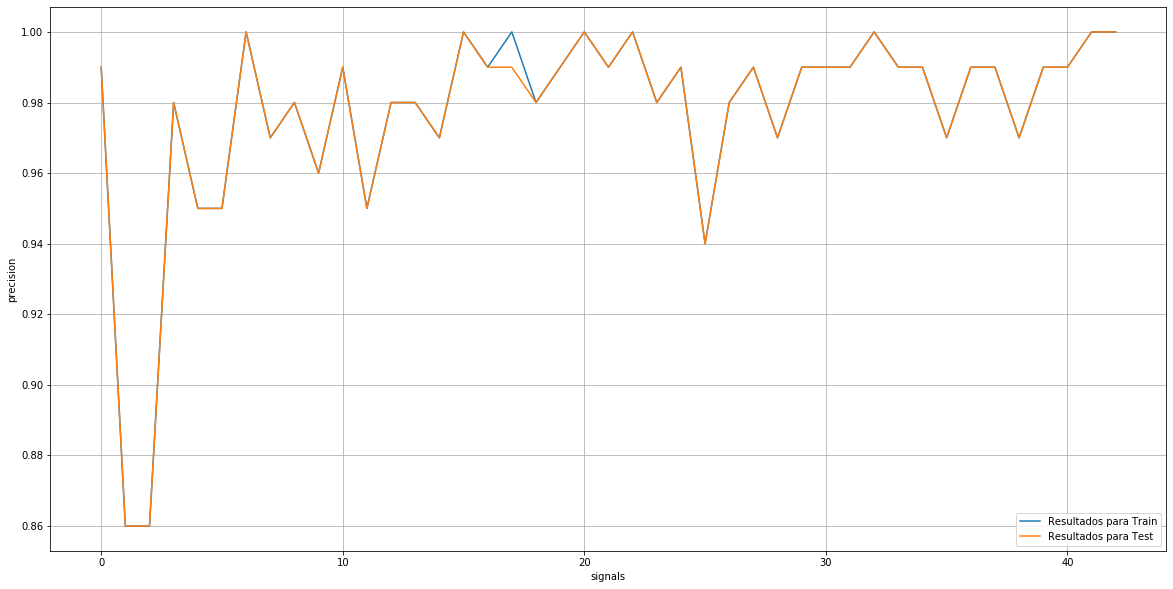

In [12]:
sig = np.arange(len(final_signals))
plt.figure(figsize=(20,10))
plt.plot(sig,predicctionsTrain,label='Resultados para Train')
# plt.plot(sig,predicctionsTest,label='Resultados para Test')
plt.xlabel('signals')
plt.ylabel('precision')
plt.grid()
plt.legend(loc=4)
plt.show()

# MODIFICAR PARA TEST!!!

In [13]:
def getSignalsLogPredicction(Xtrain,Ytrain,signals_types,carac_type):
        
    predicctionsTrain = []
    final_signals = []
    modelos = []

    for k,s in signals_types.items():
        Ytrain_T = transformarY(Ytrain,s)
        clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000).fit(Xtrain, Ytrain_T)
        prediccionTrain = clf.predict(Xtrain)
        scoreTrain = clf.score(Xtrain, Ytrain_T)

#         print(f"La precision del clasificador en TRAIN: {np.round(scoreTrain,2)} para {s}")

        predicctionsTrain.append(np.round(scoreTrain,2))
        final_signals.append(s)
        modelos.append(clf)
    
#     sig = np.arange(len(final_signals))
#     plt.figure(figsize=(20,10))
#     plt.ylim(0.8, 1)
#     plt.plot(sig,predicctionsTrain,label='Resultados para Train')
#     plt.title(carac_type)
#     plt.xlabel('signals')
#     plt.ylabel('precision')
#     plt.grid()
#     plt.legend(loc=4)
#     plt.show()
    
    predMediaTrain = sum(predicctionsTrain)/len(predicctionsTrain)
    
    print(f'Prediccion media TRAIN: {predMediaTrain}')
    
    return modelos,predMediaTrain,np.array(predicctionsTrain)
    

In [14]:
def deNumeroASignal(num):
    if num<10:
        tipo = '0000'+str(num)
    else:
        tipo = '000'+str(num)
    return tipo

In [17]:
typeDescriptors = ['sift','surf','fast_brief','orb']
trafic_signals = crearDiccionarioDatos()
signals_types = devolverDiccionarioEtiquetas()
bestypeDes = None
Modelos = None
bestXtest = None
bestYtrain = None
bestPrediccionTrain = 0
prediccionesPorSignal = None

for carac_type in typeDescriptors:
    
    Xtrain,Ytrain,Xtest,Ytest = creaMatrizCaracteristicas(trafic_signals, signals_types, carac_type)
    
    modelos, prediccionTrain, predicctionsTrain = getSignalsLogPredicction(Xtrain,Ytrain,signals_types,carac_type)
    
    if bestPrediccionTrain < prediccionTrain:
        Modelos = modelos
        bestypeDes = carac_type
        prediccionesPorSignal = predicctionsTrain
        bestXtest = Xtest
        bestYtest = Ytest


Prediccion media TRAIN: 0.9767441860465115
Prediccion media TRAIN: 0.9769767441860465
Prediccion media TRAIN: 0.9772093023255813
Prediccion media TRAIN: 0.9772093023255813


In [21]:
trafic_signals['00002']

[array([[25, 26, 25, ..., 19, 20, 21],
        [25, 25, 24, ..., 19, 20, 20],
        [25, 25, 25, ..., 20, 20, 20],
        ...,
        [27, 29, 29, ..., 20, 20, 22],
        [30, 33, 29, ..., 21, 20, 23],
        [33, 31, 29, ..., 20, 20, 21]], dtype=uint8),
 array([[255, 255, 255, ..., 246, 245, 245],
        [255, 255, 255, ..., 246, 246, 245],
        [255, 255, 255, ..., 246, 246, 246],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[ 64,  64,  57, ...,  71,  77,  81],
        [ 64,  64,  57, ...,  71,  77,  81],
        [153, 153,  88, ...,  68,  74,  88],
        ...,
        [ 54,  54,  53, ..., 152, 151, 130],
        [ 36,  36,  37, ..., 138, 119, 102],
        [ 34,  34,  34, ...,  95,  89,  86]], dtype=uint8),
 array([[ 19,  19,  29, ...,  21,  23,  30],
        [ 19,  19,  29, ...,  21,  23,  30],
        [ 19,  19,  29, ...,  21,  17,  25],
       

In [27]:

# probar con el conjunto de test
print(bestypeDes)
ytest = []

for i in range(Xtest.shape[0]):

    y_aux = np.zeros(len(Modelos))
    z = 0
    
    for mod in Modelos:
        y_aux[z] = mod.predict(Xtest[i].reshape(1,-1))
        z+=1
        
    pred = np.argwhere(y_aux==1)
    
    if pred.size>1:
        a = deNumeroASignal(pred[np.argmax(prediccionesPorSignal[pred])])
        print('----------')
        print(a)
        ytest.append(signals_types[a])
    else:
        a = deNumeroASignal(pred)
        print('++++++++++')
        print(a)
        b = signals_types[a]
        print('ttttttttttttttt')
        print(b)
        ytest.append(b)
ytest = np.array(ytest).reshape(-1,1)
print(bestYtest.shape,ytest.shape)
ytest==bestYtest

orb
++++++++++
000[]


C:\ProgramData\Anaconda3\envs\py37vision\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


KeyError: '000[]'

# Neural Networks 

PASAR POR AHORA

In [ ]:

encoder = OneHotEncoder(sparse=False)
# Aplica el fit_transform de scikit a y para obtener el nuevo y_onehot
y_onehot = encoder.fit_transform(y.reshape(-1,1))

#esto quiere decir que hay 'n' posibles clases. Se pondra un 1 en la clase que participa, y 0 en la clase que no participa.
#La participacion va por  'registros'
#Para mas info: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
y_onehot

In [ ]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [ ]:
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    bias = np.ones(m).reshape(-1,1)
    
    # Añadimos la columna de unos a X para obtener a1
    a1 = np.hstack((bias,X))
    
    # Calculamos z2 -> ten en cuenta que a1 tiene tantas filas como ejemplos y columnas como atributos + 1
    # Por otro lado, theta1 tiene tantas filas como neuronas en la capa oculta y columnas como atributos + 1
    z2 = a1*theta1.T
    
    # Añadimos la columna de unos a la sigmoide de z2 (que es a2) para obtener el a2 definitivo
    a2 = np.hstack((np.ones(z2.shape[0]).reshape(-1,1),sigmoid(z2)))
    
    # Calculamos z3
    z3 = a2*theta2.T
    
    # Obtenemos la salida final en h
    h = sigmoid(z3)
    
    return a1, z2, a2, z3, h

In [ ]:
def cost(params, input_size, hidden_size, num_labels, X, y):
    m = X.shape[0]
    # Utilizamos las matrices de numpy por facilidad: * es el producto de matrices y np.multiply elemento por elemento
    X = np.matrix(X)
    y = np.matrix(y)
    
    # desempaquetamos las matrices con los parámetros para cada capa
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # Ejecutamos las propagación hacia adelante para obtener las salidas para cada ejemplo
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # Calculamos el coste
    J = (1/m)*(np.sum(np.multiply((-y),np.log(h))-np.multiply((1-y),np.log(1-h))))
    
    return J

In [ ]:
# Configuración inicial
input_size = X.shape[1] #numero de caracteristicas de X
hidden_size = 25
num_labels = y.size
np.random.seed(123456789)

# Inicializamos los parámetros de la red aleatoriamente
# El tamaño del array es el tamaño de las dos matrices de pesos concatenadas
params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.25

# Podemos desempaquetar los parámetros que acabamos de inicializar igual que lo hacemos en la función de coste
theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

# Veamos si los tamaños de las matrices theta1 y theta2 son correctos
theta1.shape, theta2.shape

In [ ]:
lambda_reg = 1.0 #Parametro regularizador

In [ ]:
def costReg(params, input_size, hidden_size, num_labels, X, y, lambda_reg):
    m = X.shape[0]
    # Utilizamos las matrices de numpy por facilidad: * es el producto de matrices y np.multiply elemento por elemento
    X = np.matrix(X)
    y = np.matrix(y)
    
    # desempaquetamos las matrices con los parámetros para cada capa, obtener theta1 y theta2
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # Ejecutamos las propagación hacia adelante para obtener las salidas para cada ejemplo
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # Calculamos el coste
    J = (1/m)*(np.sum(np.multiply((-y),np.log(h))-np.multiply((1-y),np.log(1-h))))
    
    # Es decir, la suma de los parámetros al cuadrado sin considerar la primera columna en ninguna de las dos matrices de parámetros
    J += (lambda_reg/(2*m))*(np.sum(np.sum(np.multiply(theta1,theta1))+np.sum(np.multiply(theta2,theta2))))
    
    return J

In [ ]:
def sigmoid_gradient(z):
    g = sigmoid(z)
    return np.multiply(g,(1-g))

In [ ]:
def backpropReg(params, input_size, hidden_size, num_labels, X, y, lambda_reg):
    ###################################################################
    # Copiar aquí el código de la función de coste con regularización #
    ###################################################################
    
    m = X.shape[0]
    # Utilizamos las matrices de numpy por facilidad: * es el producto de matrices y np.multiply elemento por elemento
    X = np.matrix(X)
    y = np.matrix(y)
    
    # desempaquetamos las matrices con los parámetros para cada capa, obtener theta1 y theta2
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # Ejecutamos las propagación hacia adelante para obtener las salidas para cada ejemplo
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # Calculamos el coste
    J = (1/m)*(np.sum(np.multiply((-y),np.log(h))-np.multiply((1-y),np.log(1-h))))
    
    # Es decir, la suma de los parámetros al cuadrado sin considerar la primera columna en ninguna de las dos matrices de parámetros
    J += (lambda_reg/(2*m))*(np.sum(np.sum(np.multiply(theta1,theta1))+np.sum(np.multiply(theta2,theta2))))
    
     ############################
    # Comienza Backpropagation #
    ############################
    # Inicializamos los acumuladores delta1  y delta2 a ceros, con las dismensiones de los theta1 y theta2
    # tendrán dimensiones (25, 401) y (10, 26), respectivamente
    delta1 = np.zeros(theta1.shape)
    delta2 = np.zeros(theta2.shape)
    
    # Aunque podríamos vectorizarlo vamos a hacerlo para cada ejemplo
    for t in range(m):
        # Obtenemos lo que necesitamos del ejemplo (cálculos obtenidos en la propagación hacia adelante)
        # Para usar las fórmulas tal y como aparecen, vamos a coger todos los vectores en forma columna (resahpe(-1,1))
        a1t = a1[t,:].reshape(-1, 1)  # (401, 1)
        z2t = z2[t,:].reshape(-1, 1)  # (25, 1)
        a2t = a2[t,:].reshape(-1, 1)  # (26, 1)
        ht = h[t,:].reshape(-1, 1)  # (10, 1)
        yt = y[t,:].reshape(-1, 1)  # (10, 1)
        
        # Calculamos el error en la capa de salida (delta3), almacenar en d3t
        d3t = ht - yt
        
        # Para calcular el error en la capa oculta (delta2) necesitamos añadir un uno al inicio del vector z2t
        # Almacenar en z2t
        z2t = np.vstack((1,z2t))
        
        # Calculamos d2 a partir del error de la capa de salida, los parámetros en theta2 y el gradiente de z2t (guardar en d2t)
        # <RELLENAR>
        d2t = np.multiply(theta2.T*d3t,sigmoid_gradient(z2t))
        
        # Ya podemos calcular los gradientes a partir de los errores
        # Para calcular el gradiente de los theta1, tenemos en cuenta el error en la capa oculta d2
        # Acumular el gradiente del ejemplo en delta1 y delta2
        delta1 += d2t[1:]*a1t.T
        delta2 += d3t*a2t.T
    
    # Calculamos el gradiente finalmente dividiendo entre el número de ejemplos
    delta1 = delta1/m
    delta2 = delta2/m
    
    # Añadimos el término de regularización en delta1 y delta2 (no regularizar el bias)
    
    delta1[:,1:] += lambda_reg*theta1[:,1:]/m
    delta2[:,1:] += lambda_reg*theta2[:,1:]/m
    
    # Para pasar los gradientes a minimize los ponemos en un vector
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, grad

In [ ]:
J, grad = backpropReg(params, input_size, hidden_size, num_labels, X, y_onehot, lambda_reg)
print(J, grad.shape)

# Entrenamiento de la red y clasificación

Ahora ya estamos listos para entrenar la red y usarla para hacer predicciones. Para entrenarla, utilizamos el método `minimize`de scipy, indicándole que backpropReg es la función que calcula el coste y los gradientes.


In [ ]:
from scipy.optimize import minimize

# Minimizar la función objetivo que acabamos de definir
fmin = minimize(fun=backpropReg, x0=params, args=(input_size, hidden_size, num_labels, X, y_onehot, lambda_reg), 
                method='TNC', jac=True, options={'maxiter': 250})

In [ ]:
# Desempaquetamos los parámetros obtenidos como resultado del entrenamiento almacenados en fmin.x
# Crea las variables theta1 y theta2
theta1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

# Utilizamos los parámetros desempaquetados con la propagación hacia adelante para obtener la predicción para nuestros ejemplos
a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)

# Finalmente, para obtener la clase para cada ejemplo, buscamos de las diez salidas cual es la más alta
# y usamos su índice como valor predicho (utilizar np.argmax con axis=1 que hace precísamente eso).
y_pred = np.argmax(h,axis=1)

In [ ]:
accTrain = metrics.accuracy_score(y_pred, y)

print("Precisión en train: {}%".format(accTrain*100))

In [ ]:
scaler = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
signal = 'FinVelocidadMaxima80'
clf = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000)
Ytrain_T = transformarY(Ytrain, signal)
clf.fit(Xtrain, Ytrain_T.reshape(-1))
# clf.predict(Xtrain)
clf.predict(Xtest)
# clf.score(Xtrain,Ytrain)
Ytest_T = transformarY(Ytest, signal)
clf.score(Xtest,Ytest_T)
